In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

#Conectamos con mi drive drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Mostramos el dataset
stress = pd.read_csv("/content/drive/MyDrive/DataSets/StressLevelDataset.csv")
stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


Coeficiente (pendiente): [0.09896182]
Intercepto: -0.09851391943416088


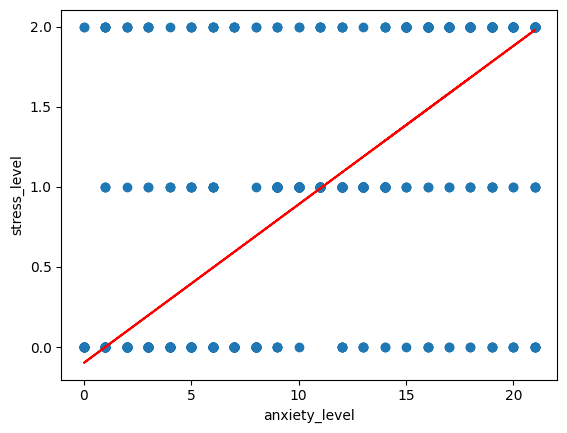

In [ ]:
#Regresion lineal
# Extraer las columnas de variables independientes y dependientes
X = stress["anxiety_level"].values.reshape(-1, 1)
y = stress["stress_level"].values

# Crear un objeto de regresión lineal
regression = LinearRegression()

# Ajustar el modelo a tus datos
regression.fit(X, y)

# Realizar predicciones para los datos de entrenamiento
predictions = regression.predict(X)

# Imprimir los coeficientes de la regresión
print("Coeficiente (pendiente):", regression.coef_)
print("Intercepto:", regression.intercept_)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, label="Datos reales")
plt.plot(X, predictions, label="Línea de regresión", color='red')
plt.xlabel("anxiety_level")
plt.ylabel("stress_level")
#plt.legend()
plt.show()

In [ ]:
#KNN
#Trabajamos unicamente con los valores de entrenamiento "X" y con sus respectivas clasificaciones "Y"
#NOTA: El argumento axis=1 indica que se están eliminando columnas. Si el valor es 0 (por defecto), se eliminarían filas.
x=stress.drop(['stress_level'], axis=1) #borramos el Id y su clasificación
y=stress['stress_level']
print(x)
print(y)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

In [ ]:
#Declaración de la función que va a dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [ ]:
#Hacemos la dunción que nos calculará la distancia entre dos puntos
def euclidean_distance(p:np.ndarray,q:np.ndarray):
  return np.sqrt(np.sum((p-q)**2))

In [ ]:
#La función que va a predecir la clasificiación de x, considerando la distancia euclideana y los vecinos más cercanos
#En Dist se guardaran las distancias de un punto de nuestro conjunto de prueba con respecto a los de entrenamiento
def pred(x,x_train,y_train,k):
  dist=[]
  for i, row in x_train.iterrows():
    dist.append(euclidean_distance(row,x))
#En dist2 se guardarán las distancia de manera ordenada y con respecto a k[1,3,5] y se selecciona la que más alla
  dist2=np.argsort(dist)[:k]
  k_nearest_labels=[]
  for i in dist2:
    k_nearest_labels.append(y_train.iloc[i])
  return np.bincount(k_nearest_labels).argmax()

In [ ]:
#Aquí ahora se predice todas las etiquetas de nuestro conjunto de prueba
def pred_all(test,train,y_train,k):
  pred_todos=[]
  for i, row in test.iterrows():
    pred_todos.append(pred(row,train,y_train,k))
  return pred_todos

In [ ]:
caso1=pred_all(X_test,X_train,y_train,5)

In [ ]:
caso2=pred_all(X_test,X_train,y_train,3)

In [ ]:
caso3=pred_all(X_test,X_train,y_train,1)

In [ ]:
print(caso1)

[2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2]


In [ ]:
#Precision
precision5=skm.precision_score(caso1,y_test,average='weighted')
print("Precisión de 5:",round(precision5,2)*100,'%')
#precision3=skm.precision_score(caso2,y_test,average='weighted')
#print("Precisión de 3:",round(precision3,2)*100,'%')
#precision1=skm.precision_score(caso3,y_test,average='weighted')
#print("Precisión de 1:",round(precision1,2)*100,'%')

Precisión de 5: 87.0 %


In [ ]:
#Accuracy
exactitud5=skm.accuracy_score(caso1, y_test)
print("Exactitud para k=5", round(exactitud5, 2)*100, "%")
#exactitud3=skm.accuracy_score(caso2, y_test)
#print("Exactitud para k=5", round(exactitud3, 2)*100, "%")
#exactitud1=skm.accuracy_score(caso3, y_test)
#print("Exactitud para k=5", round(exactitud1, 2)*100, "%")

Exactitud para k=5 87.0 %


In [ ]:
#Sensibilidad
sensibilidad5=skm.recall_score(caso1,y_test,average='weighted')
print("sensibilidad para k=5", round(sensibilidad5,2)*100, "%")
#sensibilidad3=skm.recall_score(caso2,y_test,average='weighted')
#print("sensibilidad para k=5", round(sensibilidad3,2)*100, "%")
#sensibilidad1=skm.recall_score(caso3,y_test,average='weighted')
#print("sensibilidad para k=5", round(sensibilidad1,2)*100, "%")

sensibilidad para k=5 87.0 %


In [ ]:
#Puntaje
puntaje5=skm.f1_score(caso1, y_test, average='weighted')
print("F1-score para k=5", round(puntaje5,2)*100, "%")
#puntaje3=skm.f1_score(caso2, y_test, average='weighted')
#print("F1-score para k=5", round(puntaje3,2)*100, "%")
#puntaje1=skm.f1_score(caso3, y_test, average='weighted')
#print("F1-score para k=5", round(puntaje1,2)*100, "%")

F1-score para k=5 87.0 %


In [ ]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
print("Matriz para k=5:\n",confusion_matrix(caso1,y_test))
#print("Matriz para k=2:\n",confusion_matrix(caso2,y_test))
#print("Matriz para k=1:\n",confusion_matrix(caso3,y_test))

Matriz para k=5:
 [[97  7  4]
 [ 9 93  9]
 [ 6  7 98]]
